# Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

First, we're going to write a polynomial function that takes a NumPy Array and a maximal degree and returns a NumPy Matrix with columns containing the NumPy Array to all the powers up to the maximal degree.

In [1]:
import numpy as np

tmp = np.array([1., 2., 3.])
tmp_cubed = np.array([x ** 3 for x in tmp])

print(tmp)
print(tmp_cubed)

[1. 2. 3.]
[ 1.  8. 27.]


We can create an empty DataFrame using pd.DataFrame() and then add any columns to it. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [2]:
import pandas as pd

df = pd.DataFrame()
df['power_1'] = tmp
df

,power_1
0,1.0
1,2.0
2,3.0


# Polynomial_sframe function

Using the concept above, we can write a function that generates a `DataFrame` with the given degree polynomial.

In [3]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    poly_frame = pd.DataFrame()
    poly_frame['power_1'] = feature

    if degree > 1:
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            poly_frame[name] = np.array([x ** power for x in feature])

    return poly_frame

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [4]:
polynomial_frame(tmp, 3)

,power_1,power_2,power_3
0,1.0,1.0,1.0
1,2.0,4.0,8.0
2,3.0,9.0,27.0


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [5]:
sales = pd.read_csv('kc_house_data.csv')

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [6]:
sales = sales.sort_values(by=['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [7]:
poly1_data = polynomial_frame(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [8]:
from sklearn import linear_model

model1_features = ['power_1']

model1 = linear_model.LinearRegression()
model1.fit(poly1_data[model1_features], poly1_data['price'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#let's take a look at the weights before we plot
(model1.intercept_, model1.coef_)

(-43580.743094475125, array([280.6235679]))

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

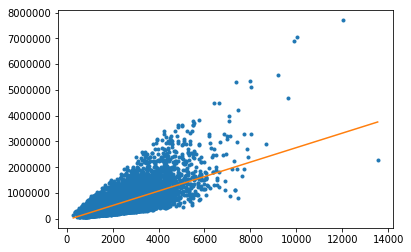

In [11]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data[model1_features]),'-')

Let's unpack that plt.plot() command. The first pair of arguments we passed are the 1st power of sqft and the actual price. We then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [12]:
# Side Note: You can get a set of column names from pandas as follows:
sales.columns.values # as array
np.array(sales.columns.values) # convert to NumPy array

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [13]:
poly2_data = polynomial_frame(sales['sqft_living'], 2)

model2_features = poly2_data.columns.values
poly2_data['price'] = sales['price'] # add price to the data since it's the target

model2 = linear_model.LinearRegression()
model2.fit(poly2_data[model2_features], poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
(model2.intercept_, model2.coef_)

(199222.27930548205, array([6.79940947e+01, 3.85812609e-02]))

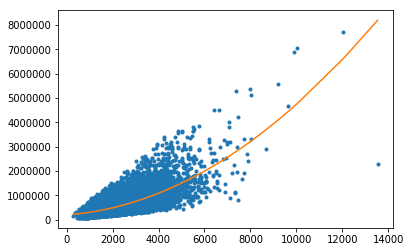

In [15]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data[model2_features]),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [16]:
poly3_data = polynomial_frame(sales['sqft_living'], 3)
model3_features = poly3_data.columns.values
poly3_data['price'] = sales['price']

model3 = linear_model.LinearRegression()
model3.fit(poly3_data[model3_features], poly3_data['price'])

(model3.intercept_, model3.coef_)

(336819.74822132086,
 array([-9.01819864e+01,  8.70465089e-02, -3.84055260e-06]))

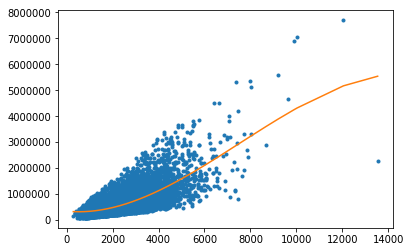

In [17]:
plt.plot(poly3_data['power_1'], poly3_data['price'], '.',
         poly3_data['power_1'], model3.predict(poly3_data[model3_features]), '-')

Now try a 15th degree polynomial:

In [18]:
poly15_data = polynomial_frame(sales['sqft_living'], 15)
model15_features = poly15_data.columns.values
poly15_data['price'] = sales['price']

model15 = linear_model.LinearRegression()
model15.fit(poly15_data[model15_features], poly15_data['price'])

(model15.intercept_, model15.coef_)

(537116.3296377396,
 array([ 4.56404164e-91, -2.64606099e-50, -1.24412815e-57,  1.80074829e-60,
         1.30265188e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
         1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
         1.61618577e-44, -2.49283826e-48,  9.59718336e-53]))

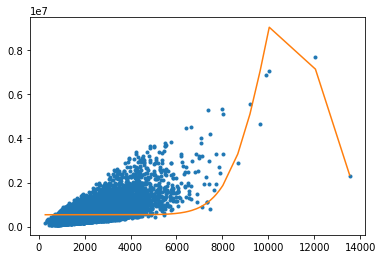

In [19]:
plt.plot(poly15_data['power_1'], poly15_data['price'], '.',
         poly15_data['power_1'], model15.predict(poly15_data[model15_features]), '-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above).

In [20]:
rand_nums = np.random.rand(len(sales))
set_1 = sales[rand_nums <= 0.25]
set_2 = sales[(rand_nums <= 0.5) * (rand_nums > 0.25)]
set_3 = sales[(rand_nums <= 0.75) * (rand_nums > 0.5)]
set_4 = sales[(rand_nums <= 1.0) * (rand_nums > 0.75)]

(len(set_1), len(set_2), len(set_3), len(set_4))

(5437, 5469, 5413, 5294)

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

518648.82002248906 [ 1.38087000e-78  5.71253442e-40 -1.86054563e-45  2.16715258e-51
  3.09730185e-54 -5.66730739e-57  4.10325748e-56  1.95837964e-52
  8.67752172e-49  3.41184439e-45  1.08691948e-41  2.18923378e-38
 -7.19566333e-42  7.85491495e-46 -2.84803994e-50]


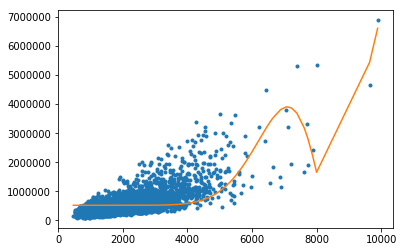

In [21]:
set_1_poly15 = polynomial_frame(set_1['sqft_living'], 15)
set_1_features = set_1_poly15.columns.values
set_1_poly15['price'] = set_1['price']

model_set1 = linear_model.LinearRegression()
model_set1.fit(set_1_poly15[set_1_features], set_1_poly15['price'])

print(model_set1.intercept_, model_set1.coef_)

plt.plot(set_1_poly15['power_1'], set_1_poly15['price'], '.',
         set_1_poly15['power_1'], model_set1.predict(set_1_poly15[set_1_features]), '-')

532418.6126247077 [ 1.00707189e-90 -4.02345903e-51  3.96020746e-56  5.28281508e-60
  2.26202548e-74  4.95677926e-71  3.99321393e-67  3.14225209e-63
  2.38413392e-59  1.70828629e-55  1.11398798e-51  6.11810499e-48
  2.26265077e-44 -3.50336499e-48  1.35342002e-52]


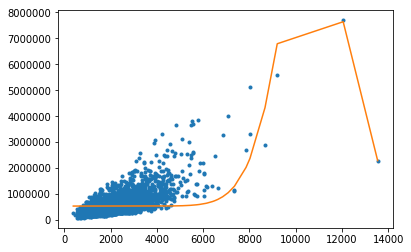

In [22]:
set_2_poly15 = polynomial_frame(set_2['sqft_living'], 15)
set_2_features = set_2_poly15.columns.values
set_2_poly15['price'] = set_2['price']

model_set2 = linear_model.LinearRegression()
model_set2.fit(set_2_poly15[set_2_features], set_2_poly15['price'])

print(model_set2.intercept_, model_set2.coef_)

plt.plot(set_2_poly15['power_1'], set_2_poly15['price'], '.',
         set_2_poly15['power_1'], model_set2.predict(set_2_poly15[set_2_features]), '-')

534499.8738865849 [ 4.51128233e-87 -2.01185107e-48  1.16485830e-54  2.53325726e-58
  1.82209732e-71  3.66873821e-68  2.01523590e-64  1.08085855e-60
  5.59036497e-57  2.73177512e-53  1.21575558e-49  4.56129374e-46
  1.15384453e-42 -2.66281491e-46  1.50815245e-50]


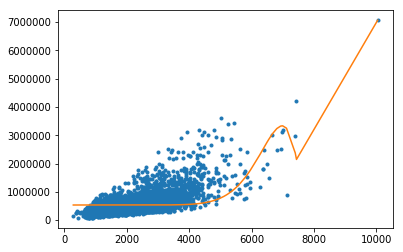

In [23]:
set_3_poly15 = polynomial_frame(set_3['sqft_living'], 15)
set_3_features = set_3_poly15.columns.values
set_3_poly15['price'] = set_3['price']

model_set3 = linear_model.LinearRegression()
model_set3.fit(set_3_poly15[set_3_features], set_3_poly15['price'])

print(model_set3.intercept_, model_set3.coef_)

plt.plot(set_3_poly15['power_1'], set_3_poly15['price'], '.',
         set_3_poly15['power_1'], model_set3.predict(set_3_poly15[set_3_features]), '-')

488700.20626978925 [ 2.87267798e-76 -5.29320914e-39  1.08694287e-44  5.32139226e-50
 -2.02934188e-53  6.04537225e-58  2.11007836e-54  7.74190523e-51
  2.62916897e-47  7.90561147e-44  1.92301725e-40  2.95409051e-37
 -1.31411781e-40  1.94885934e-44 -9.62631769e-49]


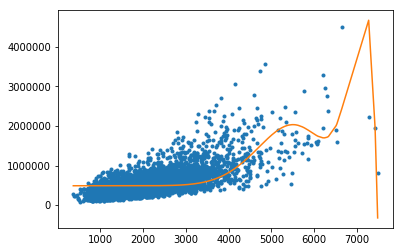

In [24]:
set_4_poly15 = polynomial_frame(set_4['sqft_living'], 15)
set_4_features = set_4_poly15.columns.values
set_4_poly15['price'] = set_4['price']

model_set4 = linear_model.LinearRegression()
model_set4.fit(set_4_poly15[set_4_features], set_4_poly15['price'])

print(model_set4.intercept_, model_set4.coef_)

plt.plot(set_4_poly15['power_1'], set_4_poly15['price'], '.',
         set_4_poly15['power_1'], model_set4.predict(set_4_poly15[set_4_features]), '-')

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing` (90 / 10 split).
* Further split our training data into two sets: `training` and `validation`. (50 / 50 split).

In [25]:
testing_mask = np.random.rand(len(sales)) > 0.9
training_and_validation = sales[~testing_mask]
testing = sales[testing_mask]

training_mask = np.random.rand(len(training_and_validation)) < 0.5
training = training_and_validation[training_mask]
validation = training_and_validation[~training_mask]

(len(training), len(validation), len(testing))

(9793, 9655, 2165)

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an `DataFrame` of polynomial data of train_data['sqft_living'] at the current degree
    * Add train_data['price'] to the polynomial `DataFrame`
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial `DataFrame` using validation data.
* Report which degree had the lowest RSS on validation data

In [26]:
def compute_rss(model, samples, output):
    predictions = model.predict(samples)
    error = output - predictions
    return np.dot(error, error)

In [30]:
max_degree = 15
models = []
for degree in range(1, max_degree + 1):
    poly_data = polynomial_frame(training['sqft_living'], degree)
    features = poly_data.columns.values
    poly_data['price'] = training['price']
    
    model = linear_model.LinearRegression()
    model.fit(poly_data[features], poly_data['price'])
    models.append(model)

best_model = None
best_model_validation_rss = None
best_degree = None
for idx, model in enumerate(models):
    degree = idx + 1
    poly_data = polynomial_frame(validation['sqft_living'], degree)
    features = poly_data.columns.values
    poly_data['price'] = validation['price']
    rss = compute_rss(model, poly_data[features], poly_data['price'])

    if best_model is None or rss < best_model_validation_rss:
        best_model = model
        best_degree = degree
        best_model_validation_rss = rss

(best_degree, best_model_validation_rss)
    


(2, 623344832571473.9)

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data.

In [33]:
poly_data = polynomial_frame(testing['sqft_living'], best_degree)
features = poly_data.columns.values
poly_data['price'] = testing['price']

best_test_rss = compute_rss(best_model, poly_data[features], poly_data['price'])
best_test_rss

192135862352843.2